### Task:
---

1. Find the XIAOSHAN airport station (China, Hangzhou) data from 2010 to 2023, and fill the missing value if have.

2. Train two time-series models

    1. montly temperature prediction (1-month period)
    
    2. daily temperature prediction (3-day periods)

    3. try to use different `eval_method` methods.

3. Predict the 2024/01--2024/07 monthly temperature and compare the result with the true value.

4. Plot and calculate the MAE.

*optional: try to train model use Kelvin and Celsius

In [1]:
!pip install obswx flaml matplotlib

In [2]:
import warnings
warnings.filterwarnings('ignore')
from obswx import *
import numpy as np
from flaml import AutoML
import matplotlib.pyplot as plt
import numpy as np

xs = pd.DataFrame()
met = obswx(source='ISD')
for year in range(2010,2023): # 2012--2022 year
    xs_ = met.get_data(year=year, station= "58457099999", isd_source="AWS")
    xs = pd.concat([xs, xs_])

xs['TMP'] = xs['TMP'].replace(',','.', regex=True).astype(float) # transform the temperature to float
xs.index = pd.to_datetime(xs['DATE'])

Getting data from NOAA ISD
Here to help select station:  https://envdes.github.io/obswx/isd_map
Getting data from NOAA ISD
Here to help select station:  https://envdes.github.io/obswx/isd_map
Getting data from NOAA ISD
Here to help select station:  https://envdes.github.io/obswx/isd_map
Getting data from NOAA ISD
Here to help select station:  https://envdes.github.io/obswx/isd_map
Getting data from NOAA ISD
Here to help select station:  https://envdes.github.io/obswx/isd_map
Getting data from NOAA ISD
Here to help select station:  https://envdes.github.io/obswx/isd_map
Getting data from NOAA ISD
Here to help select station:  https://envdes.github.io/obswx/isd_map
Getting data from NOAA ISD
Here to help select station:  https://envdes.github.io/obswx/isd_map
Getting data from NOAA ISD
Here to help select station:  https://envdes.github.io/obswx/isd_map
Getting data from NOAA ISD
Here to help select station:  https://envdes.github.io/obswx/isd_map
Getting data from NOAA ISD
Here to help 

In [3]:
xs_pred = met.get_data(year="2024", station= "58457099999", isd_source="AWS")
xs_pred['TMP'] = xs_pred['TMP'].replace(',','.', regex=True).astype(float) # transform the temperature to float
xs_pred.index = pd.to_datetime(xs_pred['DATE'])
xs_pred['T_filled'] = xs_pred['TMP'].apply(lambda x: x if x < 9999 else np.nan).interpolate(method='linear') # fill the missing values
xs_pred

Getting data from NOAA ISD
Here to help select station:  https://envdes.github.io/obswx/isd_map


,STATION,DATE,SOURCE,LATITUDE,LONGITUDE,ELEVATION,NAME,REPORT_TYPE,CALL_SIGN,QUALITY_CONTROL,...,MA1,MD1,MW1,MW2,MW3,OC1,OD1,REM,EQD,T_filled
DATE,,,,,,,,,,,,,,,,,,,,,
2024-01-01 00:00:00,58457099999,2024-01-01T00:00:00,4,30.228333,120.431667,7.01,"XIAOSHAN, CH",FM-12,99999,V020,...,"99999,9,10260,1","2,1,016,1,+999,9","05,1",NaN,NaN,NaN,"3,99,0060,1,999",SYN12458457 04932 /0601 10046 21014 30260 4031...,NaN,46.1
2024-01-01 00:00:00,58457099999,2024-01-01T00:00:00,4,30.228333,120.431667,7.01,"XIAOSHAN, CH",FM-15,99999,V020,...,"10310,1,99999,9",NaN,"05,1",NaN,NaN,NaN,NaN,MET074METAR ZSHC 010000Z 04003MPS 3000 HZ OVC0...,NaN,50.1
2024-01-01 00:30:00,58457099999,2024-01-01T00:30:00,4,30.228333,120.431667,7.01,"XIAOSHAN, CH",FM-15,99999,V020,...,"10310,1,99999,9",NaN,"05,1",NaN,NaN,NaN,NaN,MET070METAR ZSHC 010030Z 36002MPS 310V050 2800...,NaN,50.1
2024-01-01 01:00:00,58457099999,2024-01-01T01:00:00,4,30.228333,120.431667,7.01,"XIAOSHAN, CH",FM-15,99999,V020,...,"10310,1,99999,9",NaN,"05,1",NaN,NaN,NaN,NaN,MET082METAR ZSHC 010100Z 01002MPS 330V050 2800...,NaN,50.1
2024-01-01 01:30:00,58457099999,2024-01-01T01:30:00,4,30.228333,120.431667,7.01,"XIAOSHAN, CH",FM-15,99999,V020,...,"10310,1,99999,9",NaN,"05,1",NaN,NaN,NaN,NaN,MET070METAR ZSHC 010130Z 09002MPS 030V120 3000...,NaN,60.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-17 20:00:00,58457099999,2024-08-17T20:00:00,4,30.228333,120.431667,7.01,"XIAOSHAN, CH",FM-15,99999,V020,...,"10060,1,99999,9",NaN,NaN,NaN,NaN,NaN,NaN,MET052METAR ZSHC 172000Z 08002MPS CAVOK 29/25 ...,NaN,290.1
2024-08-17 20:30:00,58457099999,2024-08-17T20:30:00,4,30.228333,120.431667,7.01,"XIAOSHAN, CH",FM-15,99999,V020,...,"10060,1,99999,9",NaN,NaN,NaN,NaN,NaN,NaN,MET060METAR ZSHC 172030Z 08002MPS 060V120 CAVO...,NaN,290.1
2024-08-17 21:00:00,58457099999,2024-08-17T21:00:00,4,30.228333,120.431667,7.01,"XIAOSHAN, CH",FM-12,99999,V020,...,"99999,9,10019,1","7,1,002,1,+999,9","00,1",NaN,NaN,NaN,"3,99,0080,1,999",SYN12458457 04960 /3102 10281 20251 30019 4006...,NaN,281.1


In [4]:
# 1 find the missing value index
missing_value_index = xs.query('TMP >= 9999').index
missing_value_index

DatetimeIndex(['2013-06-19 09:00:00', '2013-07-10 21:00:00',
               '2013-08-27 06:00:00', '2013-12-16 06:30:00',
               '2013-12-16 07:00:00', '2014-02-05 18:00:00',
               '2015-01-06 12:00:00', '2015-01-28 01:30:00',
               '2015-01-28 03:00:00', '2015-01-28 03:30:00',
               '2015-01-28 04:00:00', '2015-01-28 04:30:00',
               '2015-03-05 07:30:00', '2017-01-11 06:00:00',
               '2017-01-12 03:00:00', '2020-12-14 21:00:00',
               '2020-12-15 00:00:00', '2022-07-05 06:00:00'],
              dtype='datetime64[ns]', name='DATE', freq=None)

In [5]:
xs['T_filled'] = xs['TMP'].apply(lambda x: x if x < 9999 else np.nan).interpolate(method='linear') # fill the missing values

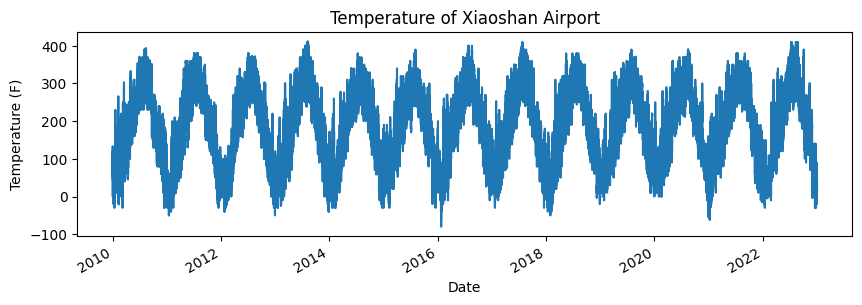

In [6]:
# plotting
fig, ax = plt.subplots(1,1, figsize=(10,3))
xs['T_filled'].plot(ax=ax)
ax.set_xlabel('Date')
ax.set_ylabel('Temperature (F)')
ax.set_title('Temperature of Xiaoshan Airport')
fig.show()

In [7]:
xs_m = xs['T_filled'].resample('M').mean().reset_index()

automl = AutoML()

automl.fit(
    dataframe=xs_m,
    label="T_filled",
    period=1,
    task="ts_forecast",
    time_budget=15,
    log_file_name="ts_forecast.log",
    eval_method="holdout",
    estimator_list=[
        "lgbm",
        "xgboost",
        "extra_tree",
    ],
)

[flaml.automl.logger: 08-20 09:44:18] {1680} INFO - task = ts_forecast
[flaml.automl.logger: 08-20 09:44:18] {1691} INFO - Evaluation method: holdout
[flaml.automl.logger: 08-20 09:44:18] {1789} INFO - Minimizing error metric: mape


INFO:flaml.automl.task.time_series_task:Couldn't import Prophet, skipping


[flaml.automl.logger: 08-20 09:44:18] {1901} INFO - List of ML learners in AutoML Run: ['lgbm', 'xgboost', 'extra_tree']
[flaml.automl.logger: 08-20 09:44:18] {2219} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 08-20 09:44:18] {2345} INFO - Estimated sufficient time budget=1422s. Estimated necessary time budget=1s.
[flaml.automl.logger: 08-20 09:44:18] {2392} INFO -  at 0.4s,	estimator lgbm's best error=1.4002,	best estimator lgbm's best error=1.4002
[flaml.automl.logger: 08-20 09:44:18] {2219} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 08-20 09:44:19] {2392} INFO -  at 0.6s,	estimator lgbm's best error=1.4002,	best estimator lgbm's best error=1.4002
[flaml.automl.logger: 08-20 09:44:19] {2219} INFO - iteration 2, current learner lgbm
[flaml.automl.logger: 08-20 09:44:19] {2392} INFO -  at 0.9s,	estimator lgbm's best error=0.7650,	best estimator lgbm's best error=0.7650
[flaml.automl.logger: 08-20 09:44:19] {2219} INFO - iteration 3, current learne

In [8]:
xs_m_test = xs_pred['T_filled'].resample('M').mean().reset_index()
test=xs_m_test['DATE']
prediction = automl.predict(test)

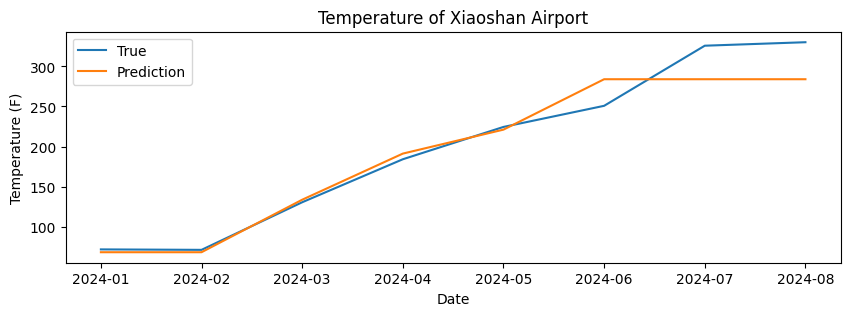

In [9]:
fig, ax = plt.subplots(1,1, figsize=(10,3))
date = xs_m_test['DATE'].dt.strftime('%Y-%m')
ax.plot(date,xs_m_test['T_filled'], label='True')
ax.plot(date,prediction, label='Prediction')
ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Temperature (F)')
ax.set_title('Temperature of Xiaoshan Airport')
fig.show()

In [10]:
print("MAE:" , np.mean(np.abs(xs_m_test['T_filled'] - prediction)))

MAE: 17.65648103252307


In [11]:
xs_D = xs['T_filled'].resample('D').mean().reset_index().ffill().bfill()

automl = AutoML()
automl.fit(
    dataframe=xs_D,
    label="T_filled",
    period=1,
    task="ts_forecast",
    time_budget=60,
    log_file_name="ts_forecast.log",
    eval_method="holdout",
    estimator_list=[
        "lgbm"
    ],
)

[flaml.automl.logger: 08-20 09:44:34] {1680} INFO - task = ts_forecast
[flaml.automl.logger: 08-20 09:44:34] {1691} INFO - Evaluation method: holdout
[flaml.automl.logger: 08-20 09:44:34] {1789} INFO - Minimizing error metric: mape


INFO:flaml.automl.task.time_series_task:Couldn't import Prophet, skipping


[flaml.automl.logger: 08-20 09:44:34] {1901} INFO - List of ML learners in AutoML Run: ['lgbm']
[flaml.automl.logger: 08-20 09:44:34] {2219} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 08-20 09:44:35] {2345} INFO - Estimated sufficient time budget=6186s. Estimated necessary time budget=6s.
[flaml.automl.logger: 08-20 09:44:35] {2392} INFO -  at 0.7s,	estimator lgbm's best error=2.4929,	best estimator lgbm's best error=2.4929
[flaml.automl.logger: 08-20 09:44:35] {2219} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 08-20 09:44:36] {2392} INFO -  at 1.9s,	estimator lgbm's best error=2.4929,	best estimator lgbm's best error=2.4929
[flaml.automl.logger: 08-20 09:44:36] {2219} INFO - iteration 2, current learner lgbm
[flaml.automl.logger: 08-20 09:44:37] {2392} INFO -  at 2.4s,	estimator lgbm's best error=1.2734,	best estimator lgbm's best error=1.2734
[flaml.automl.logger: 08-20 09:44:37] {2219} INFO - iteration 3, current learner lgbm
[flaml.automl.logg

In [12]:
xs_d_test = xs_pred['T_filled'].resample('D').mean().reset_index().ffill().bfill()
test=xs_d_test['DATE']
prediction = automl.predict(test)

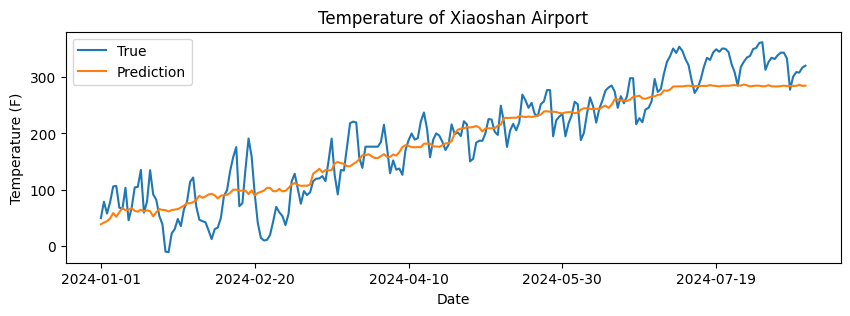

In [13]:
fig, ax = plt.subplots(1,1, figsize=(10,3))
date = xs_d_test['DATE'].dt.strftime('%Y-%m-%d')
ax.plot(date,xs_d_test['T_filled'], label='True')
ax.plot(date,prediction, label='Prediction')
ax.set_xticks(date[::50])
ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Temperature (F)')
ax.set_title('Temperature of Xiaoshan Airport')
fig.show()

In [14]:
print("MAE:" , np.mean(np.abs(xs_d_test['T_filled'] - prediction)))

MAE: 31.785710221724635
